# Capture
## Capture Grayscale Picture

# -*- coding: utf-8 -*-
"""
Created on Mon Nov  6 14:55:36 2023

@author: jo741boe
"""

import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.color import rgb2gray

cap = cv2.VideoCapture(0)

ret, frame = cap.read()
grayscale = rgb2gray(frame)
fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(grayscale, cmap=plt.cm.gray)
ax.set_title("Grayscale")
plt.show()
cv2.imwrite("grayscale.png",frame)

print("frame width: " + str(cap.get(3)))
print("frame height: " + str(cap.get(4)))
print("--------------------------------")
print("brightness: " + str(cap.get(10)))
print("contrast: " + str(cap.get(11)))
print("saturation: " + str(cap.get(12)))
print("--------------------------------")
print("gain: " + str(cap.get(14)))
print("exposure: " + str(cap.get(15)))
print("--------------------------------")
print("white balance: " + str(cap.get(17)))
    
cap.release()
cv2.destroyAllWindows()

## Capture Weiss/Dunkelbild

# -*- coding: utf-8 -*-
"""
Created on Mon Nov  6 15:09:12 2023

@author: jo741boe
"""

import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.color import rgb2gray

cap = cv2.VideoCapture(0)
i=1
while(i <=10):
    ret, frame = cap.read()
    grayscale = rgb2gray(frame)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.imshow(grayscale, cmap=plt.cm.gray)
    ax.set_title("Grayscale")
    plt.show()
    cv2.imwrite("weissbild-"+ str(i)+".png",frame)
    i+=1
    
print("frame width: " + str(cap.get(3)))
print("frame height: " + str(cap.get(4)))
print("--------------------------------")
print("brightness: " + str(cap.get(10)))
print("contrast: " + str(cap.get(11)))
print("saturation: " + str(cap.get(12)))
print("--------------------------------")
print("gain: " + str(cap.get(14)))
print("exposure: " + str(cap.get(15)))
print("--------------------------------")
print("white balance: " + str(cap.get(17)))
cap.release()
cv2.destroyAllWindows()



# Analyse eines Grauwertkeiles

In [1]:
!pip install opencv-python
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

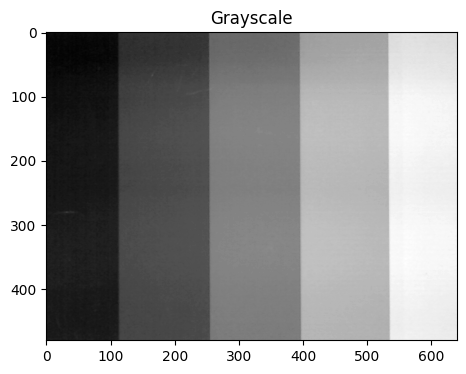

(480, 640)


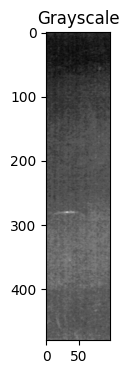

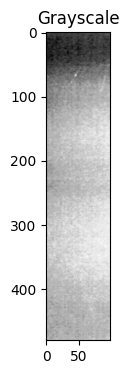

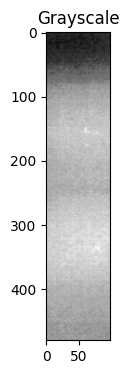

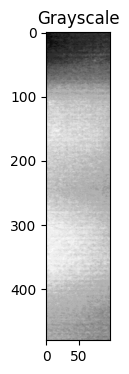

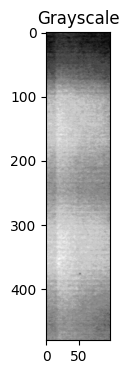

In [2]:
# Bild laden und in Graustufen umwandeln
image = cv.imread("grayscale.png")
grayImage = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(grayImage, cmap=plt.cm.gray)
ax.set_title("Grayscale")
plt.show()

print(grayImage.shape)

# Slicing der Bilder
sliced_image_1 = grayImage[:, :100]
sliced_image_2 = grayImage[:, 120:220]
sliced_image_3 = grayImage[:, 270:370]
sliced_image_4 = grayImage[:, 410:510]
sliced_image_5 = grayImage[:, 540:640]

# Ausgabe der Form der geschnittenen Bilder

fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(sliced_image_1, cmap=plt.cm.gray)
ax.set_title("Grayscale")
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(sliced_image_2, cmap=plt.cm.gray)
ax.set_title("Grayscale")
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(sliced_image_3, cmap=plt.cm.gray)
ax.set_title("Grayscale")
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(sliced_image_4, cmap=plt.cm.gray)
ax.set_title("Grayscale")
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(sliced_image_5, cmap=plt.cm.gray)
ax.set_title("Grayscale")
plt.show()

In [3]:
# Mittelwert/ std des Slices:
means = [np.mean(sliced_image_1), np.mean(sliced_image_2), np.mean(sliced_image_3), np.mean(sliced_image_4), np.mean(sliced_image_5)]
stds = [np.std(sliced_image_1), np.std(sliced_image_2), np.std(sliced_image_3), np.std(sliced_image_4), np.std(sliced_image_5)]
print(means)
print(stds)

[38.291916666666665, 80.41077083333333, 128.6951875, 177.42039583333334, 228.1426875]
[6.525721006886688, 7.39314974525851, 6.902785199215633, 6.795316758129526, 6.35085252366513]


# 2 Dunkelbild

(480, 640)
(480, 640)
(480, 640)
[[0.0246875  0.0246875  0.0246875  ... 0.0246875  0.0246875  0.0246875 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00015625 0.00015625 0.00015625 ... 0.00015625 0.00015625 0.00015625]
 [0.028125   0.028125   0.028125   ... 0.028125   0.028125   0.028125  ]]


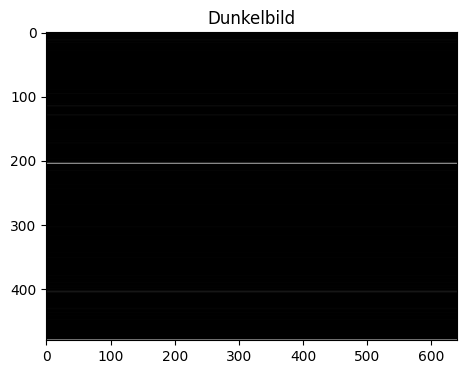

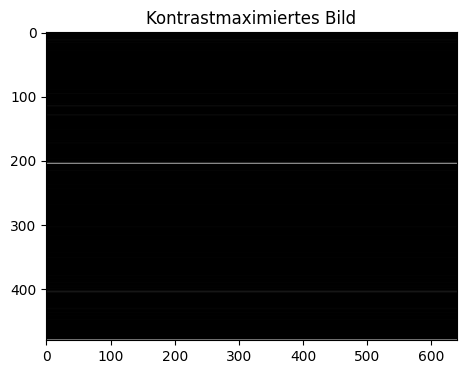

In [4]:
i = 1
temp_arr = [1,2,3,4,5,6,7,8,9,10]
while i <= 10:
    image = cv.imread("dunkelbild-"+str(i)+".png")
    darkImage = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    converted_array = np.array([[float(x) for x in row] for row in darkImage])
    #print(converted_array)
    temp_arr[i - 1] = converted_array
    i+=1
print(grayImage.shape)
print(converted_array.shape)
i = 0
dunkelbild = np.empty([480,640])
while i < 640:
    j = 0
    while  j < len(temp_arr[0]):
        temp = [1,2,3,4,5,6,7,8,9,10]
        i2 = 0
        while i2 < 10:
            temp[i2] = temp_arr[i2][j]
            i2 +=1
        dunkelbild[j][i] = np.mean(temp)
        j += 1
    i += 1
print(dunkelbild.shape)
print(dunkelbild)
fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(dunkelbild, cmap=plt.cm.gray)
ax.set_title("Dunkelbild")
plt.show()

# Helligkeits- und Kontrastanpassung
min_value = dunkelbild.min()
max_value = dunkelbild.max()
contrast_maximized_image = 255 * (dunkelbild - min_value) / (max_value - min_value)

fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(contrast_maximized_image, cmap=plt.cm.gray)
ax.set_title("Kontrastmaximiertes Bild")
plt.show()

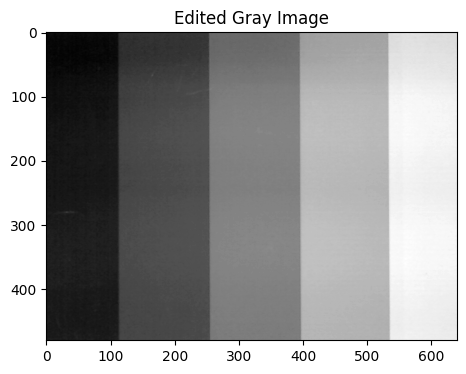

In [6]:
# vom origibalbild abziehen
converted_gray_image_array = np.array([[float(x) for x in row] for row in grayImage])
edited_gray_image = converted_gray_image_array - dunkelbild

fig, ax = plt.subplots(figsize=(8, 4))
ax.imshow(edited_gray_image, cmap=plt.cm.gray)
ax.set_title("Edited Gray Image")
plt.show()